In [1]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import rankdata, genpareto
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.stats.diagnostic import acorr_ljungbox
import seaborn as sns

In [2]:
df_cleaned = pd.read_excel("France_Brent.xlsx")

In [3]:
print(df_cleaned.dtypes)

Date          datetime64[ns]
Close_cac            float64
Brent_Euro           float64
dtype: object


In [4]:
df_cleaned

,Date,Close_cac,Brent_Euro
0,2015-01-02,4252.290039,49.936091
1,2015-01-05,4111.359863,46.058785
2,2015-01-06,4083.500000,45.193154
3,2015-01-07,4112.729980,44.237353
4,2015-01-08,4260.189941,44.570982
...,...,...,...
2621,2024-03-25,8151.600098,79.625839
2622,2024-03-26,8184.750000,79.376373
2623,2024-03-27,8204.809570,78.480143
2624,2024-03-28,8205.809570,79.616599


In [5]:
missing_values = df_cleaned.isnull().sum()
print(missing_values)

Date            0
Close_cac     259
Brent_Euro    277
dtype: int64


In [6]:
# Drop rows where both 'Close_cac' and 'Brent_Euro' are NaN
df = df_cleaned.dropna(how='all', subset=['Close_cac', 'Brent_Euro'])

In [7]:
missing_values = df.isnull().sum()
print(missing_values)

Date           0
Close_cac     11
Brent_Euro    29
dtype: int64


In [8]:
#Define the date ranges
pre_covid_start = '2015-01-01'
pre_covid_end = '2020-02-29'
covid_start = '2020-03-01'
covid_end = '2022-02-28'
post_covid_start = '2022-03-01'
post_covid_end = '2024-03-31'

In [9]:
# Filter the data
pre_covid_data = df[(df['Date'] >= pre_covid_start) & (df['Date'] <= pre_covid_end)]
covid_data = df[(df['Date'] >= covid_start) & (df['Date'] <= covid_end)]
post_covid_data = df[(df['Date'] >= post_covid_start) & (df['Date'] <= post_covid_end)]

In [10]:
pre_covid_data.tail()

,Date,Close_cac,Brent_Euro
1371,2020-02-24,5791.870117,49.724405
1372,2020-02-25,5679.680176,48.479323
1373,2020-02-26,5684.549805,48.189972
1374,2020-02-27,5495.600098,45.761184
1375,2020-02-28,5309.899902,44.989583


In [11]:
missing_values = pre_covid_data.isnull().sum()
print(missing_values)

Date           0
Close_cac     10
Brent_Euro    12
dtype: int64


In [12]:
# Forward fill missing values
pre_covid_data.fillna(method='ffill', inplace=True)

C:\Users\KASHISH NIGAM\AppData\Local\Temp\ipykernel_5896\1485561790.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_covid_data.fillna(method='ffill', inplace=True)


#### ADF TEST

In [13]:
time_series_columns = ['Close_cac', 'Brent_Euro']

def adf_test(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')

# Loop over each column and perform ADF test
for column in time_series_columns:
    print(f"ADF Test Results for {column}:")
    adf_test(pre_covid_data[column])
    print()

ADF Test Results for Close_cac:
ADF Statistic: -2.609191947778467
p-value: 0.09111232177634582
Critical Values:
   1%: -3.435287448902869
   5%: -2.8637204923840334
   10%: -2.5679309018875833

ADF Test Results for Brent_Euro:
ADF Statistic: -2.0680666219816106
p-value: 0.2575474684431123
Critical Values:
   1%: -3.435283723720563
   5%: -2.8637188486120326
   10%: -2.567930026514189



In [14]:
#Non-Stationary

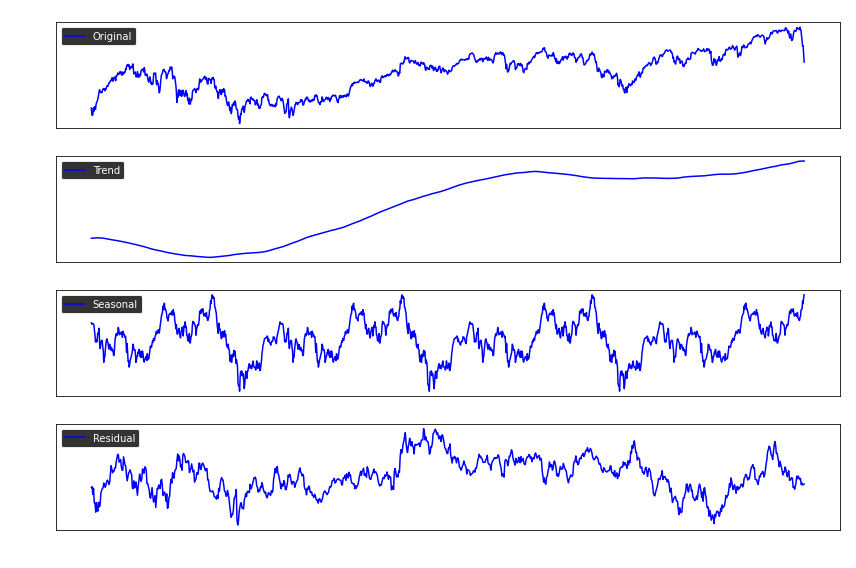

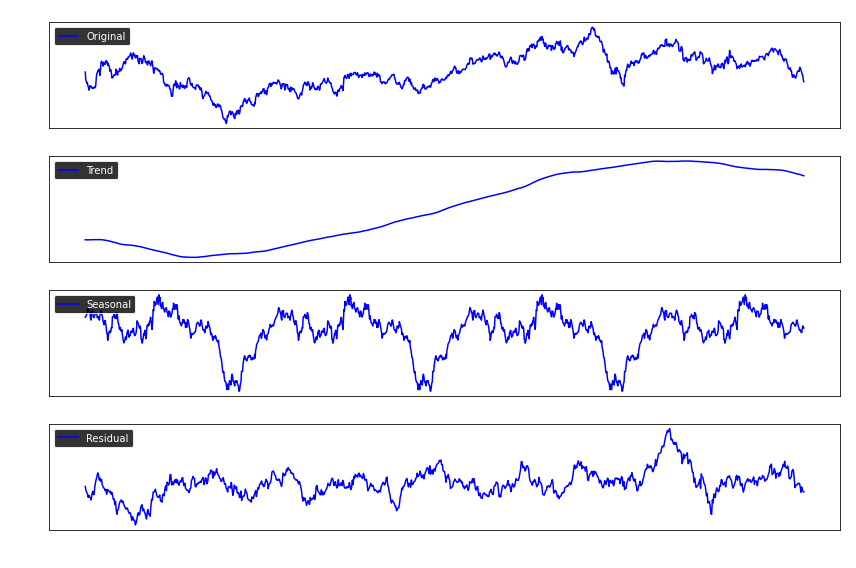

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Decompose the time series
result = seasonal_decompose(pre_covid_data['Close_cac'], model='additive', period=365)

# Plot the decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(pre_covid_data['Close_cac'], label='Original', color='blue')
plt.legend(loc='upper left', facecolor='black', edgecolor='white', labelcolor='white')
plt.ylabel('Original', color='white')
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.title('Time Series Decomposition', color='white')

plt.subplot(412)
plt.plot(result.trend, label='Trend', color='blue')
plt.legend(loc='upper left', facecolor='black', edgecolor='white', labelcolor='white')
plt.ylabel('Trend', color='white')
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')

plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal', color='blue')
plt.legend(loc='upper left', facecolor='black', edgecolor='white', labelcolor='white')
plt.ylabel('Seasonal', color='white')
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')

plt.subplot(414)
plt.plot(result.resid, label='Residual', color='blue')
plt.legend(loc='upper left', facecolor='black', edgecolor='white', labelcolor='white')
plt.ylabel('Residual', color='white')
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.xlabel('Date', color='white')

plt.tight_layout()
plt.show()


import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
result = seasonal_decompose(pre_covid_data['Brent_Euro'], model='additive', period=365)

# Plot the decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(pre_covid_data['Brent_Euro'], label='Original', color='blue')
plt.legend(loc='upper left', facecolor='black', edgecolor='white', labelcolor='white')
plt.ylabel('Original', color='white')
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.title('Time Series Decomposition', color='white')

plt.subplot(412)
plt.plot(result.trend, label='Trend', color='blue')
plt.legend(loc='upper left', facecolor='black', edgecolor='white', labelcolor='white')
plt.ylabel('Trend', color='white')
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')

plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal', color='blue')
plt.legend(loc='upper left', facecolor='black', edgecolor='white', labelcolor='white')
plt.ylabel('Seasonal', color='white')
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')

plt.subplot(414)
plt.plot(result.resid, label='Residual', color='blue')
plt.legend(loc='upper left', facecolor='black', edgecolor='white', labelcolor='white')
plt.ylabel('Residual', color='white')
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.xlabel('Date', color='white')

plt.tight_layout()
plt.show()

In [16]:
summary = pre_covid_data.describe()
print(summary)

         Close_cac   Brent_Euro
count  1329.000000  1329.000000
mean   5065.521104    50.537227
std     461.419043     9.333384
min    3896.709961    23.517696
25%    4694.720215    43.543045
50%    5115.229980    50.819756
75%    5390.479980    57.446329
max    6111.240234    72.947854


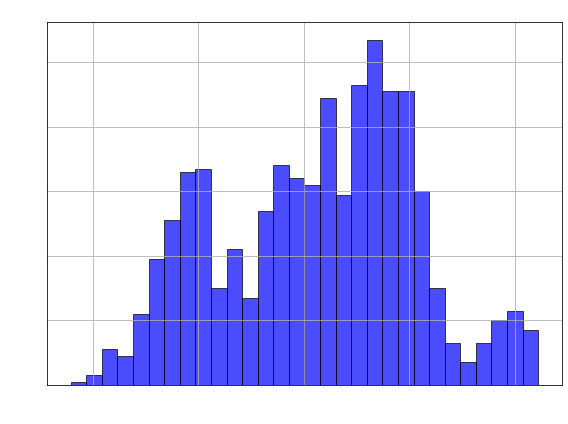

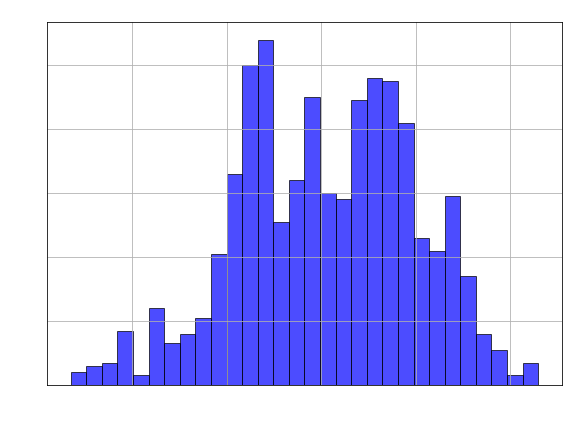

In [17]:
import matplotlib.pyplot as plt

# Plot histogram for 'Close_sp'
plt.figure(figsize=(8, 6))
plt.hist(pre_covid_data['Close_cac'], bins=30, color='blue', edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel('Close_cac', color='white')
plt.ylabel('Frequency', color='white')
plt.title('Histogram of Close_sp', color='white')

# Customize tick parameters to be white
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')

# Show grid and plot
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot histogram for 'Brent_Crude'
plt.figure(figsize=(8, 6))
plt.hist(pre_covid_data['Brent_Euro'], bins=30, color='blue', edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel('Brent_Euro', color='white')
plt.ylabel('Frequency', color='white')
plt.title('Histogram of Brent_Euro', color='white')

# Customize tick parameters to be white
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')

# Show grid and plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [18]:
pre_covid_data = pre_covid_data.copy()
pre_covid_data['Log_Return_Close_cac'] = np.log(pre_covid_data['Close_cac'] / pre_covid_data['Close_cac'].shift(1))
pre_covid_data['Log_Return_Brent_Euro'] = np.log(pre_covid_data['Brent_Euro'] / pre_covid_data['Brent_Euro'].shift(1))

In [19]:
missing_values = pre_covid_data.isnull().sum()
print(missing_values)

Date                     0
Close_cac                0
Brent_Euro               0
Log_Return_Close_cac     1
Log_Return_Brent_Euro    1
dtype: int64


In [20]:
pre_covid_data = pre_covid_data.dropna()

In [21]:
missing_values = pre_covid_data.isnull().sum()
print(missing_values)

Date                     0
Close_cac                0
Brent_Euro               0
Log_Return_Close_cac     0
Log_Return_Brent_Euro    0
dtype: int64


In [22]:
import pandas as pd
from scipy.stats import skew, kurtosis, jarque_bera
# Create a summary statistics DataFrame for pre_covid_data
summary_stats_pre_covid = pd.DataFrame(index=pre_covid_data.columns, columns=['Mean', 'Max', 'Min', 'SD', 'Skew', 'Ex. Kurt.', 'J–B'])

for col in pre_covid_data.columns:
    if pd.api.types.is_numeric_dtype(pre_covid_data[col]):
        summary_stats_pre_covid.at[col, 'Mean'] = pre_covid_data[col].mean()
        summary_stats_pre_covid.at[col, 'Max'] = pre_covid_data[col].max()
        summary_stats_pre_covid.at[col, 'Min'] = pre_covid_data[col].min()
        summary_stats_pre_covid.at[col, 'SD'] = pre_covid_data[col].std()
        summary_stats_pre_covid.at[col, 'Skew'] = skew(pre_covid_data[col])
        summary_stats_pre_covid.at[col, 'Ex. Kurt.'] = kurtosis(pre_covid_data[col], fisher=True)
        jb_stat, jb_p_value = jarque_bera(pre_covid_data[col])
        summary_stats_pre_covid.at[col, 'J–B'] = jb_stat
    else:
        summary_stats_pre_covid.at[col, 'Mean'] = 'N/A'
        summary_stats_pre_covid.at[col, 'Max'] = 'N/A'
        summary_stats_pre_covid.at[col, 'Min'] = 'N/A'
        summary_stats_pre_covid.at[col, 'SD'] = 'N/A'
        summary_stats_pre_covid.at[col, 'Skew'] = 'N/A'
        summary_stats_pre_covid.at[col, 'Ex. Kurt.'] = 'N/A'
        summary_stats_pre_covid.at[col, 'J–B'] = 'N/A'

# Round the summary statistics to 6 decimal places, except for 'N/A' values
summary_stats_pre_covid = summary_stats_pre_covid.applymap(lambda x: round(x, 6) if isinstance(x, (int, float)) else x)
print("Summary Statistics for Pre-Covid Data:")
print(summary_stats_pre_covid)


Summary Statistics for Pre-Covid Data:
                              Mean          Max          Min          SD  \
Date                           N/A          N/A          N/A         N/A   
Close_cac              5066.133476  6111.240234  3896.709961  461.052302   
Brent_Euro                50.53768    72.947854    23.517696    9.336886   
Log_Return_Close_cac      0.000167     0.040604    -0.083844    0.010648   
Log_Return_Brent_Euro    -0.000079     0.118851    -0.080825    0.022641   

                           Skew Ex. Kurt.          J–B  
Date                        N/A       N/A          N/A  
Close_cac             -0.108733 -0.650362    26.021144  
Brent_Euro            -0.223742 -0.391511    19.561539  
Log_Return_Close_cac  -0.626526    4.9292  1431.315523  
Log_Return_Brent_Euro  0.377386  2.317318   328.660226  


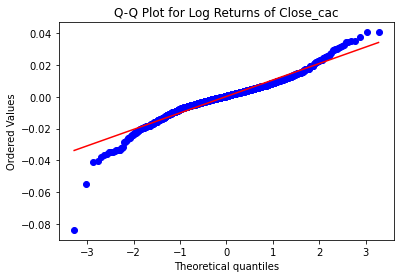

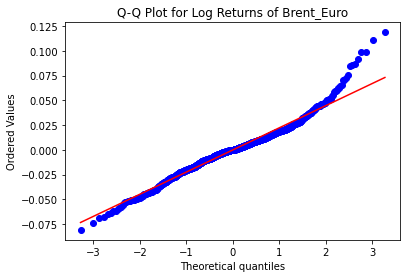

In [42]:
import scipy.stats as stats
# Plot Q-Q plot for 'Log_Return_Close_nifty'
stats.probplot(pre_covid_data['Log_Return_Close_cac'].dropna(), dist="norm", plot=plt)
plt.title('Q-Q Plot for Log Returns of Close_cac')
plt.show()

# Plot Q-Q plot for 'Log_Return_Brent_INR'
stats.probplot(pre_covid_data['Log_Return_Brent_Euro'].dropna(), dist="norm", plot=plt)
plt.title('Q-Q Plot for Log Returns of Brent_Euro')
plt.show()

In [43]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller, kpss
# Augmented Dickey-Fuller Test
def adf_test(series, title=''):
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series, autolag='AIC')
    labels = ['ADF Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    out = pd.Series(result[:4], index=labels)
    for key, value in result[4].items():
        out[f'Critical Value ({key})'] = value
    print(out)
    print('')

# KPSS Test
def kpss_test(series, title=''):
    print(f'KPSS Test: {title}')
    result = kpss(series, regression='c', nlags="auto")
    labels = ['KPSS Statistic', 'p-value', 'Lags Used']
    out = pd.Series(result[:3], index=labels)
    for key, value in result[3].items():
        out[f'Critical Value ({key})'] = value
    print(out)
    print('')

In [44]:
# Perform ADF test for Close_nifty log returns
adf_test(pre_covid_data['Log_Return_Close_cac'], title='Log Return Close_cac')

# Perform KPSS test for Close_nifty log returns
kpss_test(pre_covid_data['Log_Return_Close_cac'], title='Log Return Close_cac')

# Perform ADF test for Brent_INR log returns
adf_test(pre_covid_data['Log_Return_Brent_Euro'], title='Log Return Brent_Euro')

# Perform KPSS test for Brent_INR log returns
kpss_test(pre_covid_data['Log_Return_Brent_Euro'], title='Log Return Brent_Euro')

Augmented Dickey-Fuller Test: Log Return Close_cac
ADF Statistic                   -35.201093
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    1327.000000
Critical Value (1%)              -3.435287
Critical Value (5%)              -2.863720
Critical Value (10%)             -2.567931
dtype: float64

KPSS Test: Log Return Close_cac
KPSS Statistic           0.050234
p-value                  0.100000
Lags Used                5.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64

Augmented Dickey-Fuller Test: Log Return Brent_Euro
ADF Statistic                   -35.775262
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    1327.000000
Critical Value (1%)              -3.435287
Critical Value (5%)              -2.863720
Critical Value (10%)             -2.

C:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
C:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [24]:
#Both Close_cac and Brent_Euro log returns appear to be stationary based on the results from the ADF and KPSS tests. This implies that their statistical properties such as mean 
#nd variance do not change over time, which is 
#often a desirable property for time series modeling

In [45]:
# Rescale the log returns
pre_covid_data['Log_Return_Close_cac_scaled'] = pre_covid_data['Log_Return_Close_cac'] * 100
pre_covid_data['Log_Return_Brent_Euro_scaled'] = pre_covid_data['Log_Return_Brent_Euro'] * 100

In [46]:
from arch import arch_model
# Refit the models with the rescaled data
model_close_cac_scaled = arch_model(pre_covid_data['Log_Return_Close_cac_scaled'], vol='Garch', p=1, o=1, q=1)
results_close_cac_scaled = model_close_cac_scaled.fit(disp='off')
print(results_close_cac_scaled.summary())


from arch import arch_model
model_brent_Euro_scaled = arch_model(pre_covid_data['Log_Return_Brent_Euro_scaled'], vol='Garch', p=1, o=1, q=1)
results_brent_Euro_scaled = model_brent_Euro_scaled.fit(disp='off')
print(results_brent_Euro_scaled.summary())

                        Constant Mean - GJR-GARCH Model Results                        
Dep. Variable:     Log_Return_Close_cac_scaled   R-squared:                       0.000
Mean Model:                      Constant Mean   Adj. R-squared:                  0.000
Vol Model:                           GJR-GARCH   Log-Likelihood:               -1791.73
Distribution:                           Normal   AIC:                           3593.46
Method:                     Maximum Likelihood   BIC:                           3619.42
                                                 No. Observations:                 1328
Date:                         Tue, Jun 04 2024   Df Residuals:                     1327
Time:                                 17:07:24   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
----------------------------------------------------

In [47]:
# The results provided are for two GJR-GARCH (Glosten-Jagannathan-Runkle Generalized Autoregressive Conditional Heteroskedasticity) models applied to the log returns of `Close_cac` and `Brent_Euro`. The GJR-GARCH model accounts for asymmetries in the volatility of the time series, which means it can model different reactions of volatility to positive and negative shocks. Here is an interpretation of the results for both models:

# ### Log Return Close_cac

# #### Mean Model:
# - **mu (0.0309)**: This represents the constant mean of the log returns. The p-value (0.168) is greater than 0.05, indicating that this parameter is not statistically significant at the 5% level.

# #### Volatility Model:
# - **omega (0.0310)**: This is the constant term in the variance equation. It is statistically significant (p-value = 0.00671), suggesting it plays an important role in the model.
# - **alpha[1] (0.0099)**: This represents the ARCH term, indicating the short-term persistence of shocks to volatility. The high p-value (0.767) shows it is not significant.
# - **gamma[1] (0.2432)**: This is the leverage term, capturing the asymmetry. It is highly significant (p-value = 0.00001932), indicating that negative shocks have a larger impact on volatility than positive shocks.
# - **beta[1] (0.8504)**: This is the GARCH term, representing the long-term persistence of volatility. It is highly significant (p-value ≈ 0), suggesting strong persistence in volatility.

# ### Log Return Brent_Euro

# #### Mean Model:
# - **mu (-0.0263)**: This represents the constant mean of the log returns. The p-value (0.692) is much greater than 0.05, indicating that this parameter is not statistically significant.

# #### Volatility Model:
# - **omega (0.0403)**: This is the constant term in the variance equation. The high p-value (0.676) indicates it is not statistically significant.
# - **alpha[1] (1.3464e-09)**: This represents the ARCH term, indicating the short-term persistence of shocks to volatility. With a p-value of 1.000, it is not significant.
# - **gamma[1] (0.0677)**: This is the leverage term, capturing the asymmetry. It is highly significant (p-value = 0.0000579), indicating that negative shocks have a larger impact on volatility than positive shocks.
# - **beta[1] (0.9589)**: This is the GARCH term, representing the long-term persistence of volatility. It is highly significant (p-value ≈ 0), suggesting strong persistence in volatility.

# ### Summary:
# - For `Close_cac`:
#   - The mean return (mu) is not statistically significant.
#   - The volatility model indicates significant leverage effect (gamma[1]) and strong persistence in volatility (beta[1]).
#   - The constant term (omega) is also significant.

# - For `Brent_Euro`:
#   - The mean return (mu) is not statistically significant.
#   - The volatility model shows a significant leverage effect (gamma[1]) and strong persistence in volatility (beta[1]).
#   - Neither the constant term (omega) nor the short-term volatility persistence (alpha[1]) is significant.

# These results suggest that both `Close_cac` and `Brent_Euro` exhibit asymmetry in their volatility, with negative shocks having a larger impact on volatility than positive shocks. Volatility in both series shows strong persistence over time.

In [48]:
# # Plot the standardized residuals
# plt.figure(figsize=(10, 6))
# plt.plot(results_close_sp_scaled.resid / results_close_sp_scaled.conditional_volatility)
# plt.title('Standardized Residuals - Close sp')
# plt.show()

# plt.figure(figsize=(10, 6))
# plt.plot(results_brent_Crude_scaled.resid / results_brent_Crude_scaled.conditional_volatility)
# plt.title('Standardized Residuals - Brent Crude')
# plt.show()

In [50]:
# Assuming `results` is the fitted GJR-GARCH model for Close_nifty
standardized_residuals_cac = results_close_cac_scaled.resid / results_close_cac_scaled.conditional_volatility

# Assuming `results_brent` is the fitted GJR-GARCH model for Brent_INR
standardized_residuals_brent = results_brent_Euro_scaled.resid / results_brent_Euro_scaled.conditional_volatility


<AxesSubplot:ylabel='Density'>

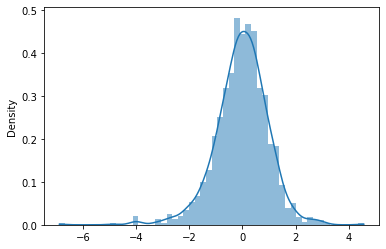

In [51]:
sns.histplot(standardized_residuals_cac, kde=True, stat="density", linewidth=0)

<AxesSubplot:ylabel='Density'>

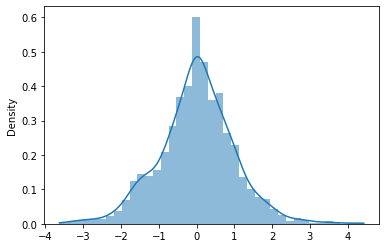

In [52]:
sns.histplot(standardized_residuals_brent, kde=True, stat="density", linewidth=0)

In [53]:
# Creating a DataFrame for easy handling
standardized_residuals = pd.DataFrame({
    'cac': standardized_residuals_cac,
    'Brent': standardized_residuals_brent
})

In [54]:
from scipy.stats import shapiro

# Perform Shapiro-Wilk test for sp
shapiro_sp = shapiro(standardized_residuals['cac'])
print("Shapiro-Wilk test for cac:")
print("Test Statistic:", shapiro_sp[0])
print("p-value:", shapiro_sp[1])

# Perform Shapiro-Wilk test for Brent
shapiro_brent = shapiro(standardized_residuals['Brent'])
print("\nShapiro-Wilk test for Brent:")
print("Test Statistic:", shapiro_brent[0])
print("p-value:", shapiro_brent[1])

Shapiro-Wilk test for cac:
Test Statistic: 0.967172005424907
p-value: 8.79518640364772e-17

Shapiro-Wilk test for Brent:
Test Statistic: 0.9885409722923754
p-value: 1.0636700745188495e-08


In [55]:
# The Shapiro-Wilk test is used to check the normality of a dataset. Here are the results of the Shapiro-Wilk test for `Close_cac` and `Brent_Euro`:

# ### Shapiro-Wilk Test Results

# #### Close_cac:
# - **Test Statistic**: 0.9672
# - **p-value**: 8.80e-17

# #### Brent_Euro:
# - **Test Statistic**: 0.9885
# - **p-value**: 1.06e-08

# ### Interpretation

# The null hypothesis for the Shapiro-Wilk test is that the data is normally distributed. 

# - **Close_cac**:
#   - The test statistic (0.9672) is relatively high, indicating a distribution that is close to normal.
#   - However, the p-value (8.80e-17) is extremely low, much lower than the common significance level of 0.05. This means we reject the null hypothesis and conclude that the log returns of `Close_cac` are not normally distributed.

# - **Brent_Euro**:
#   - The test statistic (0.9885) is higher than that of `Close_cac`, suggesting an even closer fit to a normal distribution.
#   - Despite this, the p-value (1.06e-08) is still very low, indicating that we also reject the null hypothesis for `Brent_Euro`. Therefore, the log returns of `Brent_Euro` are not normally distributed.

# ### Summary

# Both `Close_cac` and `Brent_Euro` log returns fail the Shapiro-Wilk test for normality, meaning that neither set of log returns follows a normal distribution. This is a common outcome for financial time series data, which often exhibit characteristics like skewness and kurtosis that deviate from normality.

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde, genpareto
from statsmodels.distributions.empirical_distribution import ECDF

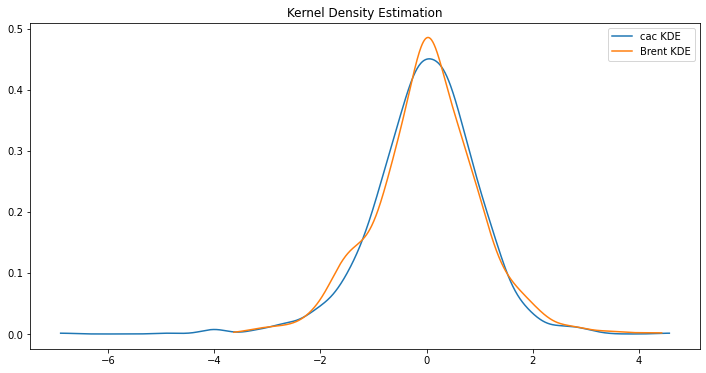

In [57]:
kde_cac = gaussian_kde(standardized_residuals['cac'])
kde_brent = gaussian_kde(standardized_residuals['Brent'])

# Plot the KDE
x_grid_cac = np.linspace(standardized_residuals['cac'].min(), standardized_residuals['cac'].max(), 1000)
x_grid_brent = np.linspace(standardized_residuals['Brent'].min(), standardized_residuals['Brent'].max(), 1000)

plt.figure(figsize=(12, 6))
plt.plot(x_grid_cac, kde_cac(x_grid_cac), label='cac KDE')
plt.plot(x_grid_brent, kde_brent(x_grid_brent), label='Brent KDE')
plt.title('Kernel Density Estimation')
plt.legend()
plt.show()

In [61]:
upper_threshold_cac = np.percentile(standardized_residuals['cac'], 90)
lower_threshold_cac = np.percentile(standardized_residuals['cac'], 10)
upper_threshold_brent = np.percentile(standardized_residuals['Brent'], 90)
lower_threshold_brent = np.percentile(standardized_residuals['Brent'], 10)

In [62]:
cac_upper_tail = standardized_residuals['cac'][standardized_residuals['cac'] > upper_threshold_cac] - upper_threshold_cac
cac_lower_tail = -standardized_residuals['cac'][standardized_residuals['cac'] < lower_threshold_cac] + lower_threshold_cac
brent_upper_tail = standardized_residuals['Brent'][standardized_residuals['Brent'] > upper_threshold_brent] - upper_threshold_brent
brent_lower_tail = -standardized_residuals['Brent'][standardized_residuals['Brent'] < lower_threshold_brent] + lower_threshold_brent

In [64]:
# Fit GPD to the tails
params_cac_upper = genpareto.fit(cac_upper_tail)
params_cac_lower = genpareto.fit(cac_lower_tail)
params_brent_upper = genpareto.fit(brent_upper_tail)
params_brent_lower = genpareto.fit(brent_lower_tail)

In [66]:
from statsmodels.distributions.empirical_distribution import ECDF

# Compute empirical CDF
ecdf_cac = ECDF(standardized_residuals['cac'])
ecdf_brent = ECDF(standardized_residuals['Brent'])

In [67]:
# Function to compute combined CDF
def combined_cdf(x, ecdf, upper_threshold, lower_threshold, params_upper, params_lower):
    c_u, loc_u, scale_u = params_upper
    c_l, loc_l, scale_l = params_lower
    if x <= lower_threshold:
        return ecdf(lower_threshold) * genpareto.cdf(-x + lower_threshold, c_l, loc_l, scale_l)
    elif x <= upper_threshold:
        return ecdf(x)
    else:
        return ecdf(upper_threshold) + (1 - ecdf(upper_threshold)) * genpareto.cdf(x - upper_threshold, c_u, loc_u, scale_u)


In [68]:
cdf_cac = [combined_cdf(x, ecdf_cac, upper_threshold_cac, lower_threshold_cac, params_cac_upper, params_cac_lower) for x in standardized_residuals['cac']]
cdf_brent = [combined_cdf(x, ecdf_brent, upper_threshold_brent, lower_threshold_brent, params_brent_upper, params_brent_lower) for x in standardized_residuals['Brent']]

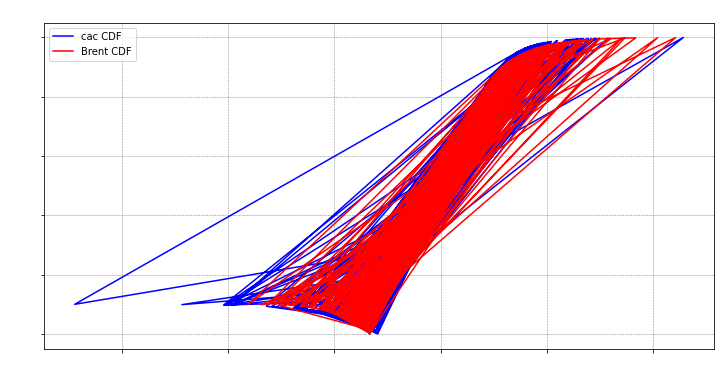

In [70]:
plt.figure(figsize=(12, 6))
plt.plot(standardized_residuals['cac'], cdf_cac, label='cac CDF', color='blue')
plt.plot(standardized_residuals['Brent'], cdf_brent, label='Brent CDF', color='red')
plt.title('Combined CDF with EVT-GPD Tails', color='white')
plt.legend()
plt.xlabel('Standardized Residuals', color='white')
plt.ylabel('CDF', color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.gca().set_facecolor('white')  # Set background color to white
plt.grid(color='gray', linestyle='--', linewidth=0.5)  # Add grid lines
plt.show()

In [73]:
# Convert the CDF values to a uniform distribution for copula modeling
uniform_cac = np.array(cdf_cac)
uniform_brent = np.array(cdf_brent)

In [74]:
uniform_cac

array([0.07475552, 0.34262048, 0.64006024, ..., 0.5060241 , 0.04752185,
       0.0204311 ])

In [75]:
uniform_brent

array([0.09048077, 0.26957831, 0.25150602, ..., 0.36370482, 0.08060381,
       0.2311747 ])

In [76]:
# Create a DataFrame from the uniform distributions
uniform_data = pd.DataFrame({
    'Uniform_cac': uniform_cac,
    'Uniform_Brent': uniform_brent
})

In [77]:
# Define the output file path
output_file = r'C:\Users\KASHISH NIGAM\Desktop\Last Sem Project\Final Datasets\France\uniform_distributions-Pre_Covid_France.xlsx'

# Save the DataFrame to an Excel file
uniform_data.to_excel(output_file, index=False)

print(f"Uniform distributions saved to {output_file}")

Uniform distributions saved to C:\Users\KASHISH NIGAM\Desktop\Last Sem Project\Final Datasets\France\uniform_distributions-Pre_Covid_France.xlsx
